## Credit Card Defaulter

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("UCI_Credit_Card.csv")

In [3]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [4]:
df.tail()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
29995,29996,220000.0,1,3,1,39,0,0,0,0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,29997,150000.0,1,3,2,43,-1,-1,-1,-1,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,29998,30000.0,1,2,2,37,4,3,2,-1,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,29999,80000.0,1,3,1,41,1,-1,0,0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1
29999,30000,50000.0,1,2,1,46,0,0,0,0,...,36535.0,32428.0,15313.0,2078.0,1800.0,1430.0,1000.0,1000.0,1000.0,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [22]:
df.shape

(30000, 25)

In [8]:
df.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

In [15]:
df.duplicated().sum()

0

In [16]:
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [39]:
df.rename(columns={'PAY_0':'PAY_1'})

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,1,3,1,39,0,0,0,0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,29997,150000.0,1,3,2,43,-1,-1,-1,-1,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,29998,30000.0,1,2,2,37,4,3,2,-1,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,29999,80000.0,1,3,1,41,1,-1,0,0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


In [40]:
df.corr()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
ID,1.000000,0.026179,0.018497,0.039177,-0.029079,0.018678,-0.030575,-0.011215,-0.018494,-0.002735,...,0.040351,0.016705,0.016730,0.009742,0.008406,0.039151,0.007793,0.000652,0.003000,-0.013952
LIMIT_BAL,0.026179,1.000000,0.024755,-0.219161,-0.108139,0.144713,-0.271214,-0.296382,-0.286123,-0.267460,...,0.293988,0.295562,0.290389,0.195236,0.178408,0.210167,0.203242,0.217202,0.219595,-0.153520
SEX,0.018497,0.024755,1.000000,0.014232,-0.031389,-0.090874,-0.057643,-0.070771,-0.066096,-0.060173,...,-0.021880,-0.017005,-0.016733,-0.000242,-0.001391,-0.008597,-0.002229,-0.001667,-0.002766,-0.039961
EDUCATION,0.039177,-0.219161,0.014232,1.000000,-0.143464,0.175061,0.105364,0.121566,0.114025,0.108793,...,-0.000451,-0.007567,-0.009099,-0.037456,-0.030038,-0.039943,-0.038218,-0.040358,-0.037200,0.028006
MARRIAGE,-0.029079,-0.108139,-0.031389,-0.143464,1.000000,-0.414170,0.019917,0.024199,0.032688,0.033122,...,-0.023344,-0.025393,-0.021207,-0.005979,-0.008093,-0.003541,-0.012659,-0.001205,-0.006641,-0.024339
AGE,0.018678,0.144713,-0.090874,0.175061,-0.414170,1.000000,-0.039447,-0.050148,-0.053048,-0.049722,...,0.051353,0.049345,0.047613,0.026147,0.021785,0.029247,0.021379,0.022850,0.019478,0.013890
PAY_0,-0.030575,-0.271214,-0.057643,0.105364,0.019917,-0.039447,1.000000,0.672164,0.574245,0.538841,...,0.179125,0.180635,0.176980,-0.079269,-0.070101,-0.070561,-0.064005,-0.058190,-0.058673,0.324794
PAY_2,-0.011215,-0.296382,-0.070771,0.121566,0.024199,-0.050148,0.672164,1.000000,0.766552,0.662067,...,0.222237,0.221348,0.219403,-0.080701,-0.058990,-0.055901,-0.046858,-0.037093,-0.036500,0.263551
PAY_3,-0.018494,-0.286123,-0.066096,0.114025,0.032688,-0.053048,0.574245,0.766552,1.000000,0.777359,...,0.227202,0.225145,0.222327,0.001295,-0.066793,-0.053311,-0.046067,-0.035863,-0.035861,0.235253
PAY_4,-0.002735,-0.267460,-0.060173,0.108793,0.033122,-0.049722,0.538841,0.662067,0.777359,1.000000,...,0.245917,0.242902,0.239154,-0.009362,-0.001944,-0.069235,-0.043461,-0.033590,-0.026565,0.216614


In [41]:
df.corr()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
ID,1.000000,0.026179,0.018497,0.039177,-0.029079,0.018678,-0.030575,-0.011215,-0.018494,-0.002735,...,0.040351,0.016705,0.016730,0.009742,0.008406,0.039151,0.007793,0.000652,0.003000,-0.013952
LIMIT_BAL,0.026179,1.000000,0.024755,-0.219161,-0.108139,0.144713,-0.271214,-0.296382,-0.286123,-0.267460,...,0.293988,0.295562,0.290389,0.195236,0.178408,0.210167,0.203242,0.217202,0.219595,-0.153520
SEX,0.018497,0.024755,1.000000,0.014232,-0.031389,-0.090874,-0.057643,-0.070771,-0.066096,-0.060173,...,-0.021880,-0.017005,-0.016733,-0.000242,-0.001391,-0.008597,-0.002229,-0.001667,-0.002766,-0.039961
EDUCATION,0.039177,-0.219161,0.014232,1.000000,-0.143464,0.175061,0.105364,0.121566,0.114025,0.108793,...,-0.000451,-0.007567,-0.009099,-0.037456,-0.030038,-0.039943,-0.038218,-0.040358,-0.037200,0.028006
MARRIAGE,-0.029079,-0.108139,-0.031389,-0.143464,1.000000,-0.414170,0.019917,0.024199,0.032688,0.033122,...,-0.023344,-0.025393,-0.021207,-0.005979,-0.008093,-0.003541,-0.012659,-0.001205,-0.006641,-0.024339
AGE,0.018678,0.144713,-0.090874,0.175061,-0.414170,1.000000,-0.039447,-0.050148,-0.053048,-0.049722,...,0.051353,0.049345,0.047613,0.026147,0.021785,0.029247,0.021379,0.022850,0.019478,0.013890
PAY_0,-0.030575,-0.271214,-0.057643,0.105364,0.019917,-0.039447,1.000000,0.672164,0.574245,0.538841,...,0.179125,0.180635,0.176980,-0.079269,-0.070101,-0.070561,-0.064005,-0.058190,-0.058673,0.324794
PAY_2,-0.011215,-0.296382,-0.070771,0.121566,0.024199,-0.050148,0.672164,1.000000,0.766552,0.662067,...,0.222237,0.221348,0.219403,-0.080701,-0.058990,-0.055901,-0.046858,-0.037093,-0.036500,0.263551
PAY_3,-0.018494,-0.286123,-0.066096,0.114025,0.032688,-0.053048,0.574245,0.766552,1.000000,0.777359,...,0.227202,0.225145,0.222327,0.001295,-0.066793,-0.053311,-0.046067,-0.035863,-0.035861,0.235253
PAY_4,-0.002735,-0.267460,-0.060173,0.108793,0.033122,-0.049722,0.538841,0.662067,0.777359,1.000000,...,0.245917,0.242902,0.239154,-0.009362,-0.001944,-0.069235,-0.043461,-0.033590,-0.026565,0.216614


<AxesSubplot:>

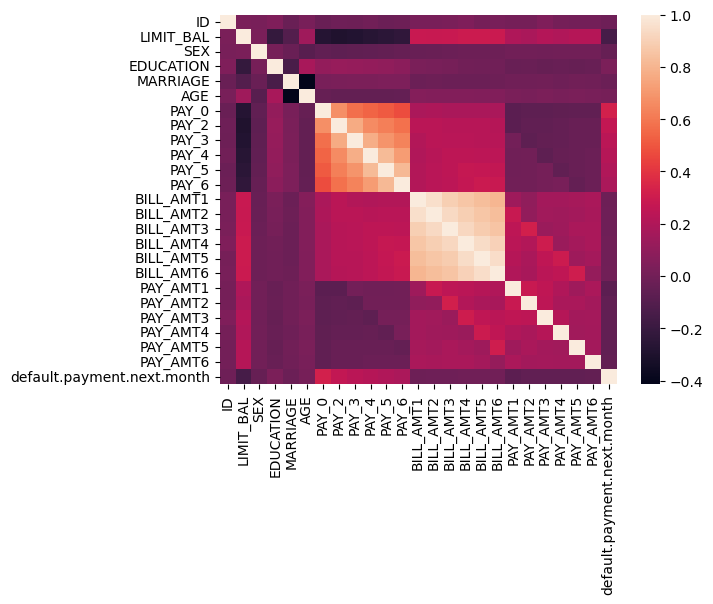

In [42]:
sns.heatmap(df.corr())

<AxesSubplot:xlabel='SEX', ylabel='default.payment.next.month'>

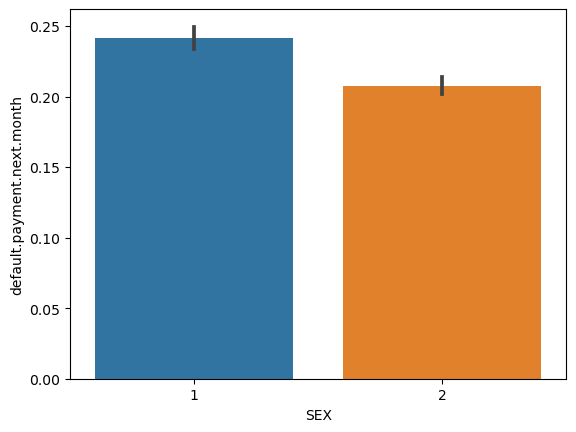

In [46]:
sns.barplot(x="SEX",y="default.payment.next.month",data=df)

<AxesSubplot:xlabel='SEX', ylabel='MARRIAGE'>

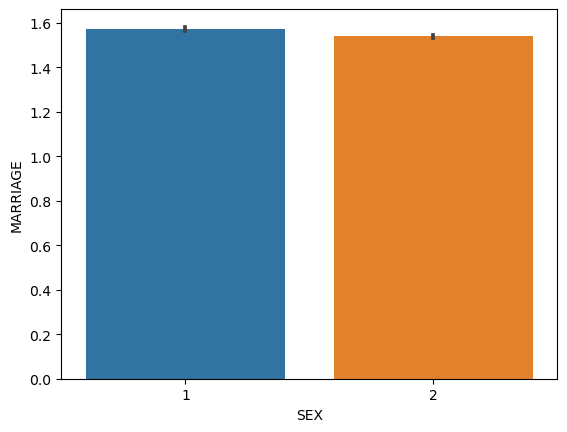

In [49]:
sns.barplot(x="SEX",y="MARRIAGE",data=df)

<AxesSubplot:xlabel='default.payment.next.month', ylabel='EDUCATION'>

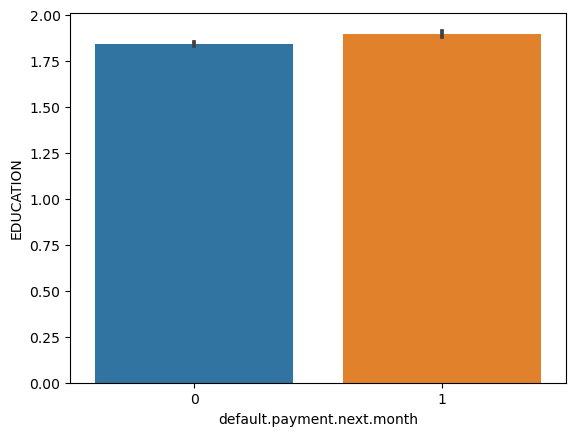

In [52]:
sns.barplot(x="default.payment.next.month",y="EDUCATION",data=df) 

<AxesSubplot:xlabel='default.payment.next.month', ylabel='AGE'>

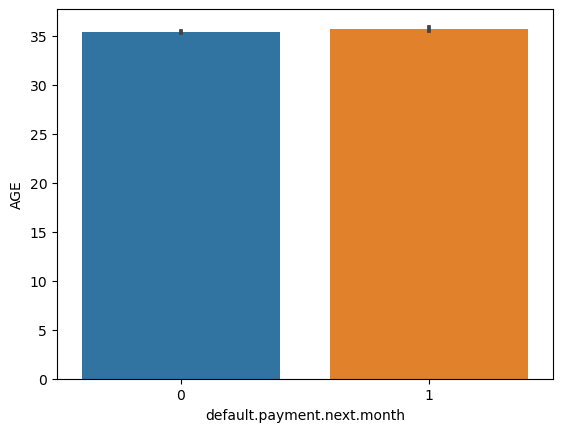

In [60]:
sns.barplot(x="default.payment.next.month",y="AGE",data=df)

In [72]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [73]:
y

0        1
1        1
2        0
3        0
4        0
        ..
29995    0
29996    0
29997    1
29998    1
29999    1
Name: default.payment.next.month, Length: 30000, dtype: int64

In [74]:
from sklearn.model_selection import train_test_split

In [94]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [95]:
X_train

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
11698,11699,80000.0,2,3,2,39,-1,-1,-1,-1,...,1814.0,4811.0,1379.0,6136.0,6734.0,1817.0,4817.0,1381.0,6137.0,6251.0
22565,22566,500000.0,1,1,2,31,-2,-2,-2,-2,...,2652.0,-11.0,-213.0,-213.0,750.0,2676.0,1.0,0.0,0.0,0.0
355,356,180000.0,1,2,1,45,-1,0,0,0,...,29650.0,29981.0,30419.0,31127.0,1481.0,2000.0,1100.0,1200.0,1500.0,1500.0
17823,17824,30000.0,1,3,2,25,2,0,0,0,...,25331.0,26347.0,27508.0,30118.0,1500.0,1500.0,1439.0,1600.0,3200.0,0.0
27417,27418,210000.0,1,1,2,39,-2,-2,-2,-2,...,0.0,0.0,0.0,0.0,7637.0,0.0,0.0,0.0,0.0,14263.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7933,7934,50000.0,2,2,1,26,0,0,0,0,...,9275.0,11181.0,2931.0,27209.0,3000.0,1000.0,5000.0,0.0,25000.0,5000.0
22985,22986,230000.0,2,2,2,40,0,0,-1,-1,...,1665.0,1228.0,8599.0,3890.0,7105.0,1762.0,1228.0,8599.0,3890.0,6999.0
27155,27156,160000.0,1,0,1,47,-1,-1,-1,-1,...,3707.0,6987.0,3853.0,4613.0,907.0,3707.0,6991.0,77.0,4613.0,4099.0
15077,15078,50000.0,1,6,1,45,0,0,0,0,...,34948.0,-52.0,848.0,850.0,2000.0,1000.0,0.0,900.0,2.0,1749.0


In [96]:
X_test

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
6158,6159,70000.0,2,1,1,62,0,0,0,0,...,60975.0,38546.0,37843.0,38632.0,4000.0,3000.0,1341.0,1359.0,1403.0,1352.0
19012,19013,150000.0,2,1,1,30,-1,-1,-1,-1,...,6484.0,12287.0,21888.0,19960.0,3537.0,6484.0,12306.0,21888.0,0.0,134.0
6187,6188,150000.0,2,2,1,28,0,0,0,0,...,13086.0,13086.0,3555.0,0.0,2000.0,1500.0,1500.0,1000.0,0.0,0.0
10274,10275,90000.0,2,1,2,25,-1,-1,2,-1,...,4788.0,7370.0,1051.0,14014.0,10850.0,5.0,5042.0,0.0,14014.0,5812.0
24216,24217,180000.0,1,3,0,27,-2,-2,-2,-2,...,1097.0,243.0,323.0,155.0,1260.0,1104.0,243.0,323.0,155.0,209.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23424,23425,300000.0,2,1,2,31,-1,-1,-1,-1,...,17865.0,9215.0,154926.0,126482.0,19099.0,17865.0,9243.0,154975.0,0.0,29390.0
9384,9385,10000.0,1,2,2,26,1,4,3,2,...,8950.0,8660.0,8840.0,9472.0,0.0,0.0,0.0,468.0,929.0,0.0
21140,21141,280000.0,1,3,2,35,0,0,0,0,...,269140.0,272665.0,159017.0,88321.0,10932.0,12011.0,10807.0,4306.0,4023.0,5387.0
8687,8688,50000.0,2,3,1,43,0,0,0,0,...,17070.0,13038.0,8904.0,4740.0,2000.0,1500.0,3500.0,600.0,500.0,4000.0


In [97]:
y_train

11698    0
22565    0
355      1
17823    1
27417    0
        ..
7933     0
22985    0
27155    0
15077    0
5064     1
Name: default.payment.next.month, Length: 22500, dtype: int64

In [98]:
y_test

6158     0
19012    0
6187     0
10274    0
24216    1
        ..
23424    0
9384     0
21140    0
8687     0
7070     1
Name: default.payment.next.month, Length: 7500, dtype: int64

In [99]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [100]:
scaler

StandardScaler()

In [101]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [102]:
X_train

array([[-0.38320044, -0.67178403,  0.81136532, ..., -0.21556763,
         0.09528462,  0.0579938 ],
       [ 0.87580495,  2.56754874, -1.23249044, ..., -0.3009661 ,
        -0.32957009, -0.29338797],
       [-1.69735321,  0.09948567, -1.23249044, ..., -0.22676033,
        -0.22572749, -0.20906984],
       ...,
       [ 1.40758325, -0.05476827, -1.23249044, ..., -0.29620456,
        -0.01021947, -0.06297462],
       [ 0.00827644, -0.90316494, -1.23249044, ..., -0.24531177,
        -0.32943164, -0.19507303],
       [-1.15178807, -1.13454586, -1.23249044, ..., -0.3009661 ,
        -0.12188488, -0.29338797]])

In [103]:
X_test

array([[-1.02504178, -0.748911  ,  0.81136532, ..., -0.21692807,
        -0.23244264, -0.21738923],
       [ 0.46416916, -0.13189524,  0.81136532, ...,  1.05254708,
        -0.32957009, -0.28585555],
       [-1.02168196, -0.13189524,  0.81136532, ..., -0.23912796,
        -0.32957009, -0.29338797],
       ...,
       [ 0.71071038,  0.87075538, -1.23249044, ..., -0.03469107,
        -0.05106422,  0.00942656],
       [-0.73204237, -0.90316494,  0.81136532, ..., -0.26386321,
        -0.29495589, -0.06853961],
       [-0.91938126, -0.67178403, -1.23249044, ..., -0.03840136,
        -0.24649601, -0.20906984]])

In [108]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()

In [114]:
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,plot_confusion_matrix
from sklearn.model_selection import cross_val_score


Accuracy: 0.81

              precision    recall  f1-score   support

           0       0.83      0.96      0.89      5868
           1       0.64      0.28      0.39      1632

    accuracy                           0.81      7500
   macro avg       0.74      0.62      0.64      7500
weighted avg       0.79      0.81      0.78      7500


Average 5-Fold CV Score: 0.8105 , Standard deviation: 0.0066


Text(0.5, 1.0, 'Confusion Matrix - Random Forest')

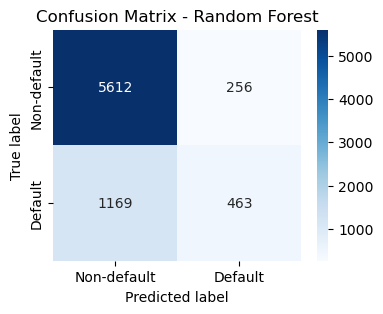

In [115]:
Ran = RandomForestClassifier(criterion= 'entropy', max_depth= 5,random_state=0)
Ran.fit(X_train, y_train)
y_pred = Ran.predict(X_test)
print('Accuracy:',accuracy_score(y_pred,y_test))

## 5-fold cross-validation 
cv_scores =cross_val_score(Ran, X, y, cv=5)

# Print the 5-fold cross-validation scores
print()
print(classification_report(y_test, y_pred))
print()
print("Average 5-Fold CV Score: {}".format(round(np.mean(cv_scores),4)),
      ", Standard deviation: {}".format(round(np.std(cv_scores),4)))

plt.figure(figsize=(4,3))
ConfMatrix = confusion_matrix(y_test,Ran.predict(X_test))
sns.heatmap(ConfMatrix,annot=True, cmap="Blues", fmt="d", 
            xticklabels = ['Non-default', 'Default'], 
            yticklabels = ['Non-default', 'Default'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title("Confusion Matrix - Random Forest")

## Hyper Parameter Tunning

In [117]:
from sklearn.model_selection import RandomizedSearchCV

In [119]:
# Create the random grid
param_dist = {'n_estimators': [50,100,150,200,250],
               "max_features": [1,2,3,4,5,6,7,8,9],
               'max_depth': [1,2,3,4,5,6,7,8,9],
               "criterion": ["gini", "entropy"]}

rf = RandomForestClassifier()

rf_cv = RandomizedSearchCV(rf, param_distributions = param_dist, 
                           cv = 5, random_state=0, n_jobs = -1)
rf_cv.fit(X_train,y_train)

print("Tuned Random Forest Parameters: %s" % (rf_cv.best_params_))

Tuned Random Forest Parameters: {'n_estimators': 200, 'max_features': 6, 'max_depth': 5, 'criterion': 'entropy'}


Accuracy: 0.8165333333333333

              precision    recall  f1-score   support

           0       0.84      0.94      0.89      5868
           1       0.64      0.36      0.46      1632

    accuracy                           0.82      7500
   macro avg       0.74      0.65      0.68      7500
weighted avg       0.80      0.82      0.80      7500


Average 5-Fold CV Score: 0.8105 , Standard deviation: 0.0066


Text(0.5, 1.0, 'Confusion Matrix - Random Forest')

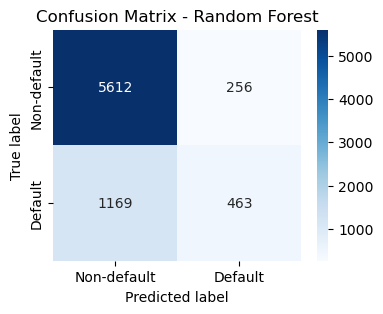

In [122]:
final_model = RandomForestClassifier(criterion= 'entropy', max_depth= 5, 
                                     max_features= 6, n_estimators= 200, 
                                     random_state=0)
final_model.fit(X_train, y_train)
y_pred = final_model.predict(X_test)
print('Accuracy:',accuracy_score(y_pred,y_test))

## 5-fold 
cv_scores =cross_val_score(Ran, X, y, cv=5)

# Print the 5-fold cross-validation scores
print()
print(classification_report(y_test, y_pred))
print()
print("Average 5-Fold CV Score: {}".format(round(np.mean(cv_scores),4)),
      ", Standard deviation: {}".format(round(np.std(cv_scores),4)))

plt.figure(figsize=(4,3))
ConfMatrix = confusion_matrix(y_test,Ran.predict(X_test))
sns.heatmap(ConfMatrix,annot=True, cmap="Blues", fmt="d", 
            xticklabels = ['Non-default', 'Default'], 
            yticklabels = ['Non-default', 'Default'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title("Confusion Matrix - Random Forest")

## conclusion

In this case we will consider recall for evaluating the credit card prediction model as under recall we evaluate out of all the predicted values how many are correctly predicted

As Random Forest best recall ,So will we considering Random Forest for Model Prediction